# 넷플릭스 데이터 EDA하기 - 9조

## 목차
#### [00. 패키지 준비 및 기본 세팅](#00-패키지-준비-및-기본-세팅)  
#### [01. 데이터 확인 및 전처리](#01-데이터-확인-및-전처리)
##### [01.01 오류값 찾기](#0101-오류값-찾기)
##### [01.02 결측치 처리](#0102-결측치-처리)
#### [02. 칼럼별 기본 EDA](#02-칼럼별-기본-eda)  


### 00. 패키지 준비 및 기본 세팅

In [5]:
import numpy as np
import pandas as pd
import warnings 

# 시각화 관련 패키지
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
warnings.filterwarnings(action='ignore')
%matplotlib inline

### 01. 데이터 확인 및 전처리

In [11]:
df = pd.read_csv("../jimin/netflix_titles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
col = df.columns

#### 01.01 오류값 찾기

In [14]:
uni_list = [{i:df[i].unique()} for i in col]


In [15]:
uni_list[8]

{'rating': array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
        'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
        'TV-Y7-FV', 'UR'], dtype=object)}

In [18]:
df.loc[(df['rating'] == '66 min')|(df['rating'] == '74 min')|(df['rating'] == '84 min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [19]:
index = df[df['rating'] == '66 min'].index 
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '74 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

index = df[df['rating'] == '84 min'].index
df.loc[index,'duration'] = df.loc[index,'rating']
df.loc[index,'rating'] = np.nan

#df.loc[df['rating'] =='66 min',col[8:10]] = df.loc[df['rating'] =='66 min',col[8:10]].shift(1,axis=1)

#### 01.02 결측치 처리

In [20]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# 크롤링 데이터 삽입 코드

### 02. 칼럼별 기본 EDA

In [25]:
col

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### 02.01 type column
- 영화: 0
- 티비쇼: 1

In [26]:
def type_col(col):
    if col == 'Movie':
        return 0
    else:
        return 1
    

In [27]:
df['type'] = df["type"].apply(type_col)

Text(0, 0.5, 'Count')

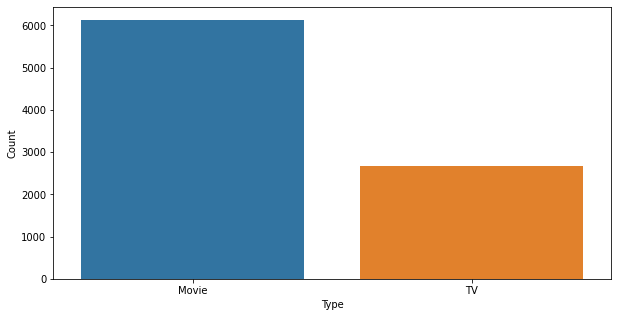

In [42]:
x = df.groupby('type').size().index
y = df.groupby('type').size().values

plt.figure(figsize=(10,5))
sns.barplot(x,y)

plt.xticks([0,1],['Movie','TV'])

plt.xlabel('Type')
plt.ylabel('Count')

#### 02.02 title column

In [ ]:
## 어떤 문자가 많이 쓰였는가
##

#### 02.03 director column

In [ ]:
## 감독 별 영화 개수 및 장르 등

#### 02.04 cast column

In [ ]:
## 배우별 출연횟수
## 장르별 배우 출연횟수
##

#### 02.05 contry column

In [ ]:
## 나라별 영화 개수 등


#### 02.06 date added

In [ ]:
## 넷플릭스가 추가한 영화 및 티비의 수가 어떻게 증가했는지(총량, 장르별 수 등)

#### 02.07 release_year column


In [ ]:
## 넷플릭스가 추가한 영화들의 연도 확인

#### 02.08 rating column
- 전체관람가('G', 'PG', 'TV-Y', 'TV-7', 'TV-Y7-FV', 'TV-G'): 0
- 12,15세 관람가('PG-13', 'TV-PG', 'TV-14'): 1
- 15, 청불('R', 'NC-17', 'NR', 'UR', 'TV-MA'): 2 

In [45]:
def rating_col(col):
    if col in ['G', 'PG', 'TV-Y','TV-Y7', 'TV-Y7-FV', 'TV-G']:
        return 0
    elif col in ['PG-13', 'TV-PG', 'TV-14']:
        return 1
    elif col in ['R', 'NC-17', 'NR', 'UR', 'TV-MA']:
        return 2
    else:
        return col

In [46]:
df['rating'] = df["rating"].apply(rating_col)

#### 02.09 duration column

In [72]:

min_col = df['duration'].str.endswith('min')
season_col = df['duration'].str.endswith(('season','seasons'))

In [ ]:
x = df.groupby('type').size().index
y = df.groupby('type').size().values

plt.figure(figsize=(10,5))
sns.barplot(x,y)

plt.xticks([0,1],['Movie','TV'])

plt.xlabel('Type')
plt.ylabel('Count')

In [77]:
df['duration'].str.endswith(('Season','seasons'))

0       False
1       False
2        True
3        True
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: duration, Length: 8807, dtype: bool

Text(0, 0.5, 'Count')

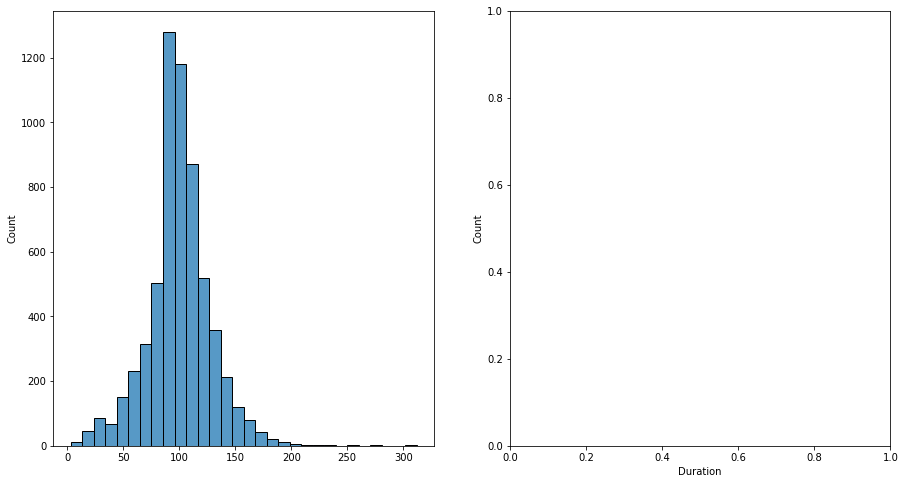

In [75]:
data1 = sorted([int(x[:-4]) for x in df[min_col]['duration']])
data2 = sorted([int(x[:-4]) for x in df[season_col]['duration']])

fig, axes = plt.subplots(1,2,figsize=(15,8))
sns.histplot(ax = axes[0],x = data1,bins = 30)
sns.histplot(ax = axes[1],x = data2,bins = 30)

plt.xlabel('Duration')
plt.ylabel('Count')

(array([1731., 1439., 1163.,  587.,  421.,  305.,  249.,  107.,   67.,
          62.]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <BarContainer object of 10 artists>)

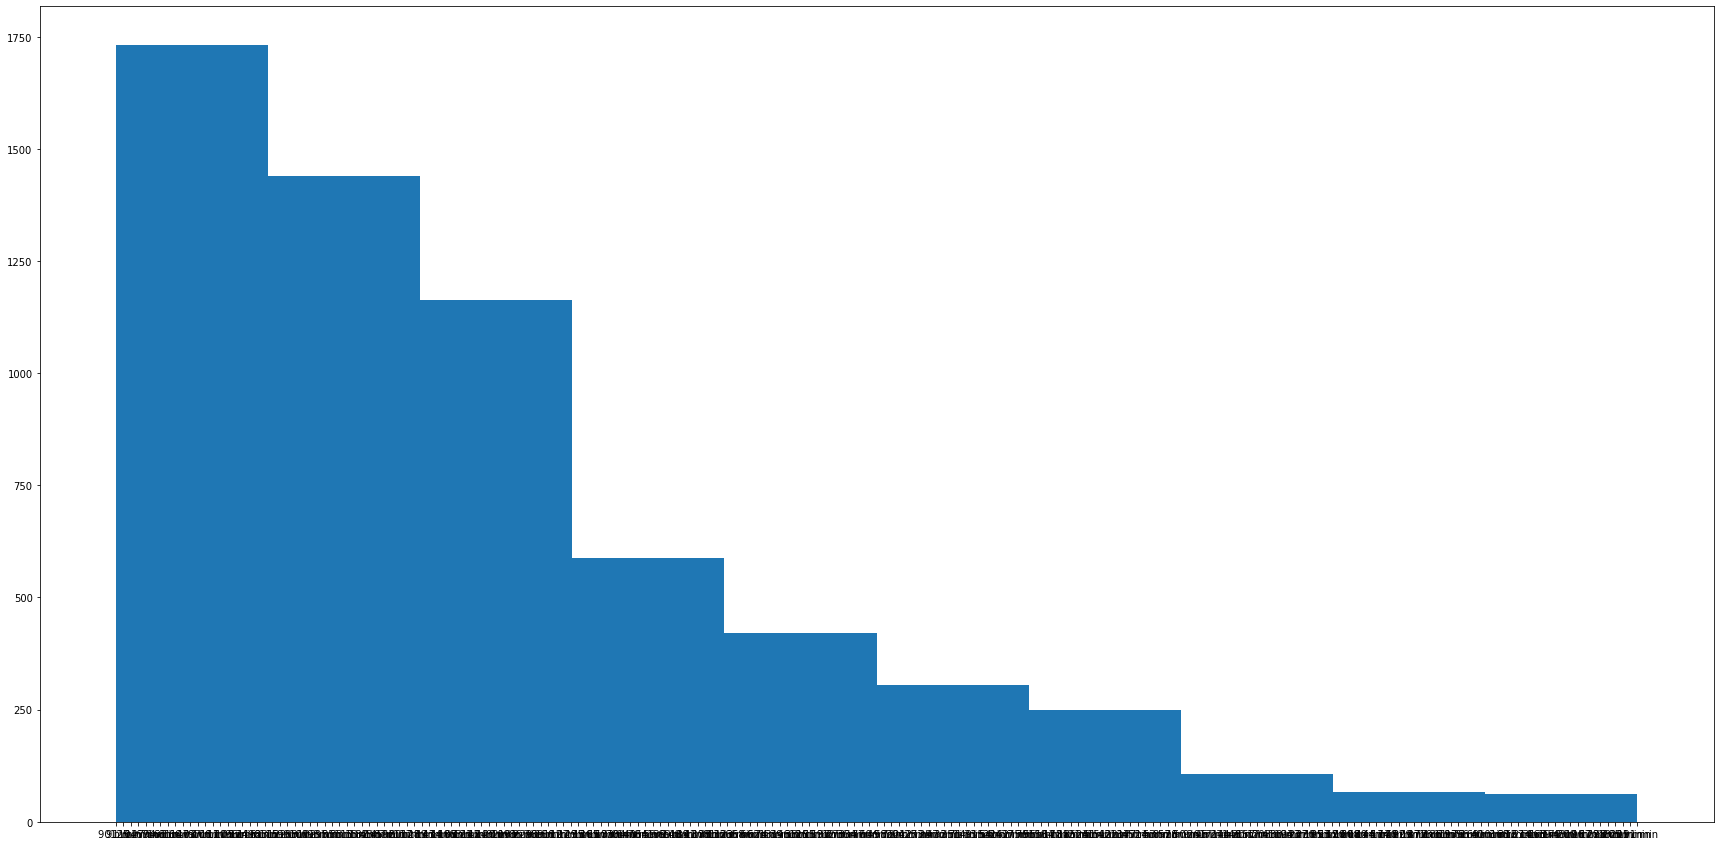

In [49]:
plt.figure(figsize=(10,15))
plt.hist(df[duration_col]['duration'])

In [ ]:
aa =df.loc[df['duration'].str.endswith('min'),'duration'] 
aa = [int(x[:-4]) for x in aa] 
plt.hist(aa) 
plt.xticks([0,30,60,90,120,150,180,210]) 

In [ ]:
plt.boxplot(aa)

#### 02.10 listed_in columnmm

In [ ]:
## 장르별 통계

#### 02.11 description columns

In [ ]:
# listed_in columns을 중복제거 후 ','로 split해서 딕셔너리에 저장
# 장르별 duration 확인
listin = df['listed_in'].dropna().unique()

listin_list = []
for x in listin:
    list_1 = x.split(',')
    for y in list_1:
        if y.strip() in listin_list:
            continue
        else:
            listin_list.append(y.strip())
listin_list
df['listed_in']  = df['listed_in'].apply(lambda x: x.split(','))

bb = {x:[] for x in listin_list}
for x in range(len(df)):
   for y in df['listed_in'][x]:
       bb[y.strip()].append(df['duration'][x])

In [ ]:
bb

In [ ]:
# season, min 혼용된 listed_in 확인 
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) != any([x.endswith('min') for x in bb[i]]):
        print(i)

In [ ]:
count=0
min_gen=[]
for i in bb:
    if all([x.endswith('min') for x in bb[i]]) == True:
        count+=1
        min_gen.append(i)


fig,ax = plt.subplots(3,3,figsize =(20,50))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.3)

len(bb)
j=0
for i in bb:
    if j==9:break
    hist_data = [int(x.split(' ')[0]) for x in bb[i]]
    ax[j//3,j%3].hist(hist_data)
    ax[j//3,j%3].set_title(i)

    j+=1